In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as plt
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler

### Load Data

In [52]:
train = pd.read_csv('data/model_data/train.csv').dropna(axis=0)
test = pd.read_csv('data/model_data/test.csv').dropna(axis=0)

In [53]:
train.shape

(78709, 239)

In [54]:
test.shape

(12964, 239)

### Renting Price 

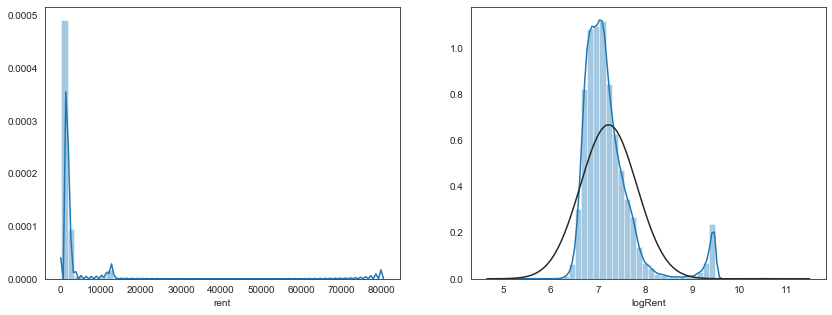

In [55]:
# Price for year 2011-2016 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

# histagram
# identify right skew
sns.distplot(train['rent'], ax=ax1)

# normalize salesprice by log transformation
from scipy.stats import norm
train['logRent'] = np.log(train['rent'])

# transformed histogram
sns.distplot(train['logRent'], fit=norm, ax=ax2)

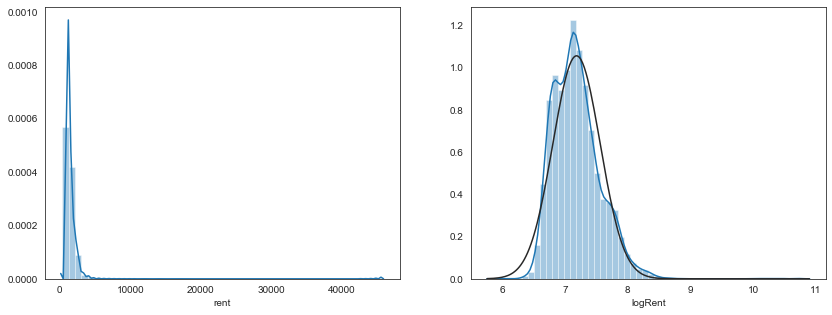

In [56]:
# Price for year 2017 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

# histagram
# identify right skew
sns.distplot(test['rent'], ax=ax1)

# normalize salesprice by log transformation
from scipy.stats import norm
test['logRent'] = np.log(test['rent'])

# transformed histogram
sns.distplot(test['logRent'], fit=norm, ax=ax2)

In [57]:
test['rent'].describe()

count    12964.000000
mean      1434.446004
std       1126.302250
min        373.000000
25%        989.500000
50%       1262.000000
75%       1619.625000
max      45675.000000
Name: rent, dtype: float64

### Feature Importance

#### by pearson correlation

In [58]:
cor = test.corr()
# Correlation with output variable
cor_target = abs(cor["rent"])
# Selecting correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

income_per_capita                                              0.409407
median_rent                                                    0.458028
renter_occupied_housing_units_paying_cash_median_gross_rent    0.449364
owner_occupied_housing_units_lower_value_quartile              0.572720
owner_occupied_housing_units_median_value                      0.582904
owner_occupied_housing_units_upper_value_quartile              0.569529
rent                                                           1.000000
logRent                                                        0.702965
Name: rent, dtype: float64

In [59]:
cols = ['income_per_capita','median_rent','renter_occupied_housing_units_paying_cash_median_gross_rent',
        'owner_occupied_housing_units_lower_value_quartile','owner_occupied_housing_units_median_value',
        'owner_occupied_housing_units_upper_value_quartile']

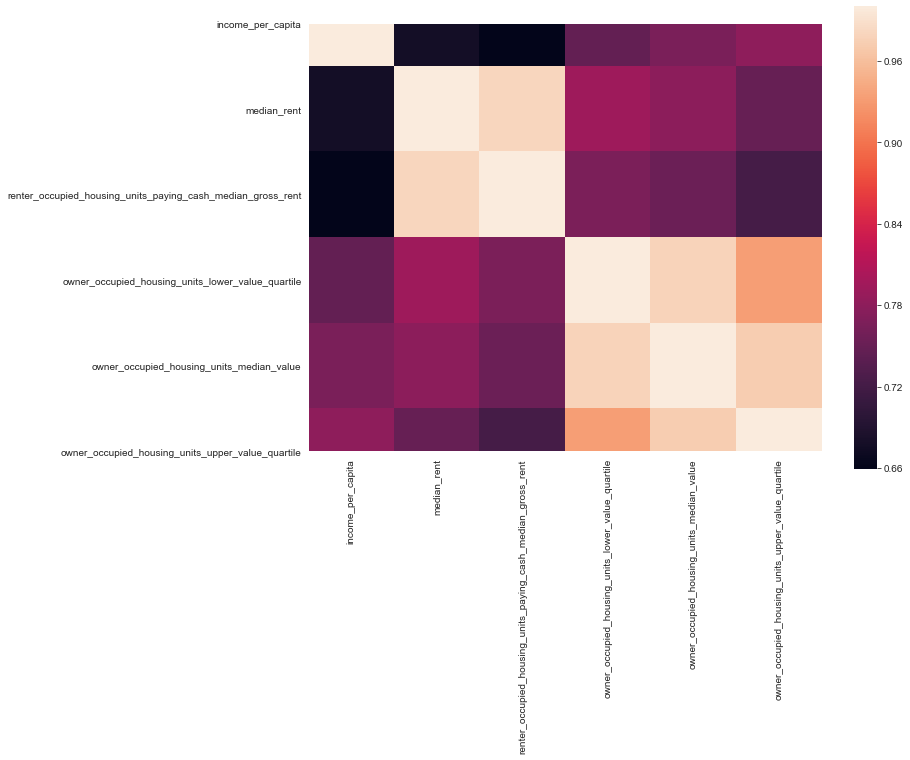

In [60]:
fig, ax = plt.subplots(figsize=(11.5,8.5))
sns.set_style("white")
sns.heatmap(test[cols].corr(),square=True)

In [61]:
test[cols] = np.log(test[cols] + 1)
test = test.rename({'income_per_capita': "Income Per Capita", 'median_rent': "Median Rent", 'renter_occupied_housing_units_paying_cash_median_gross_rent': "Renter Occupied Housing Units Paying Cash Median Gross Rent",
                                           'owner_occupied_housing_units_lower_value_quartile': 'Owner Occupied Housing Units Lower Value Quartile',
                                           'owner_occupied_housing_units_median_value': 'Owner Occupied Housing Units Median Value', 
                                           'owner_occupied_housing_units_upper_value_quartile': 'Owner Occupied Housing Units Upper Value Quartile'})

### Feature Inspection

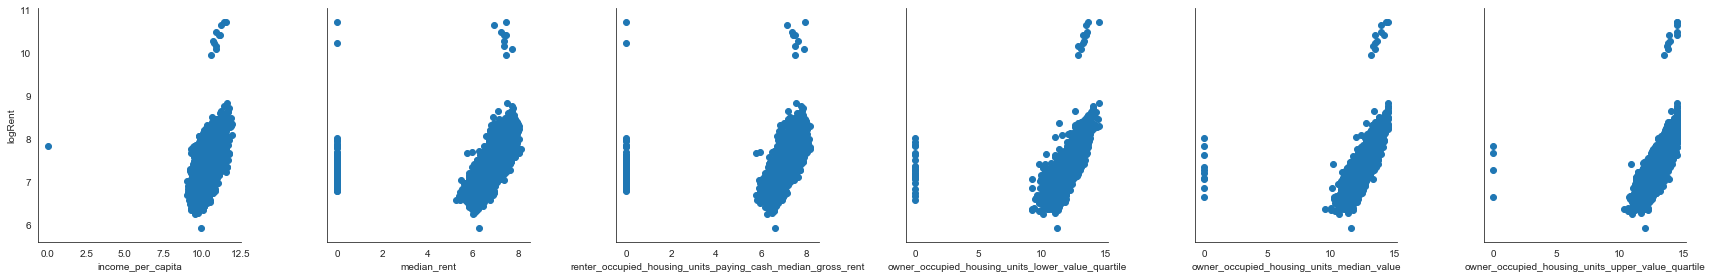

In [62]:
g = sns.PairGrid(test, y_vars=["logRent"], x_vars=cols, height=4)
g.map(plt.scatter)